**1 Dataset Selection**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

#load data from sklearn datasets
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["MedHouseVal"] = housing.target  # Add target column

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


**2 Data Pre-processing**

In [ ]:
nan_counts = df.isnull().sum()

print("NaN values in columns:\n", nan_counts[nan_counts > 0])

nan_counts

#mean filling
# df.fillna(df.mean(numeric_only=True), inplace=True)
# as no nan values

NaN values in columns:
 Series([], dtype: int64)


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


X = df.drop("MedHouseVal", axis=1)  # Features
y = df["MedHouseVal"]               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (16512, 8)
Test set shape: (4128, 8)


**3 Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#decision tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)



**4 Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#calculating root mean square error as model evaluation metric for both the models

print("🔹 Linear Regression")
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
print(f"RMSE: {lr_rmse:.3f}")

print("\n🔹 Decision Tree Regression")
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print(f"RMSE: {dt_rmse:.3f}")

🔹 Linear Regression
RMSE: 0.746

🔹 Decision Tree Regression
RMSE: 0.703


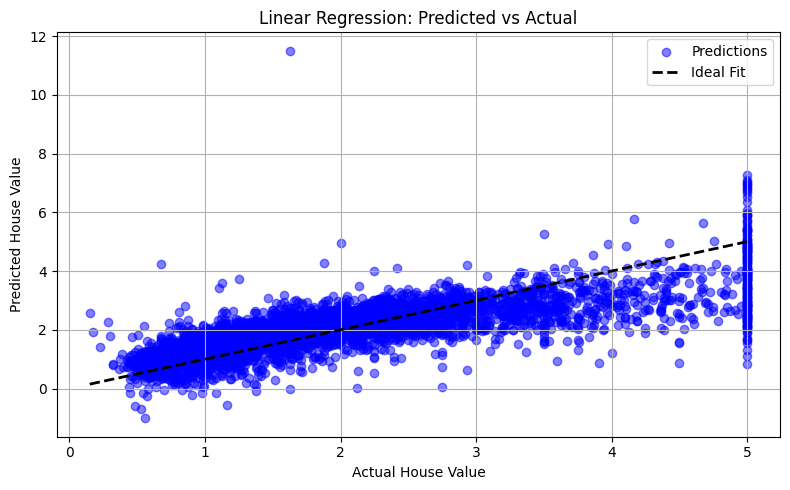

In [ ]:
import matplotlib.pyplot as plt

#plot to visulaize

#Dots near the dashed line = accurate predictions
#Dots far off the line = model error

plt.figure(figsize=(8, 5))
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

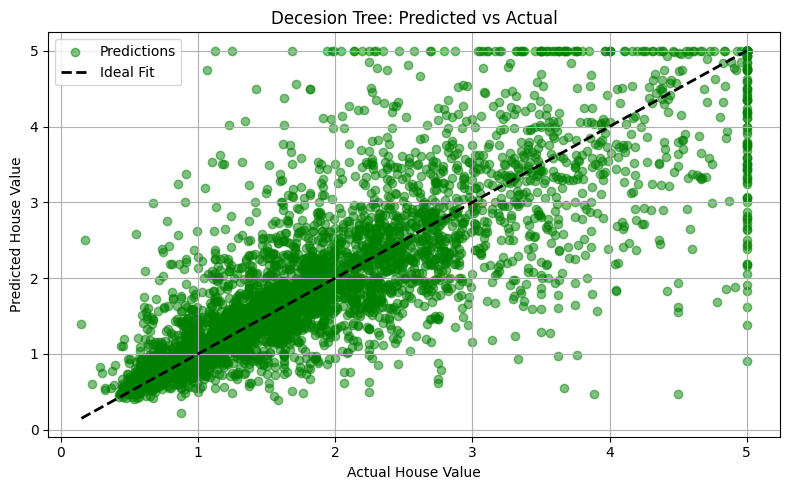

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, dt_pred, color='green', alpha=0.5, label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Decesion Tree: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

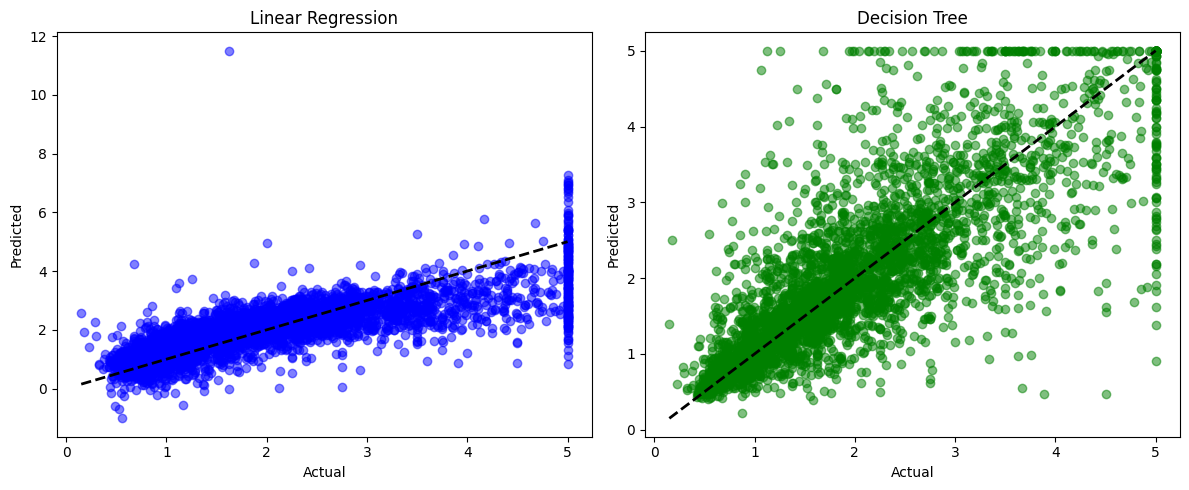

In [ ]:
plt.figure(figsize=(12, 5))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

# Decision Tree plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_pred, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree")

plt.tight_layout()
plt.show()

**5 Basic Hyperparameter Tuning**

In [ ]:
#regression
from sklearn.linear_model import RidgeCV

# Try multiple alpha values and pick the best
model = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)


Best alpha: 0.1


In [ ]:
#preidct the values according to the model trained
y_lr_pred = model.predict(X_test)

#calculate error
lr1_rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))

print(f"RMSE linear regression: {lr1_rmse:.3f}")

RMSE linear regression: 0.746


In [ ]:
#decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

param_grid = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1,verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters and model
print("✅ Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
✅ Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE decision tree: {rmse:.3f}")

RMSE decision tree: 0.639


**6 Visualization**

In the Predicted vs Actual plot: Points near the red line indicate good predictions.

In the Residual Plot: Symmetric, centered residuals around 0 suggest a good fit.

In the Residuals vs Predicted plot: Random scatter around 0 means errors are evenly spread — a sign of a well-fitted model.

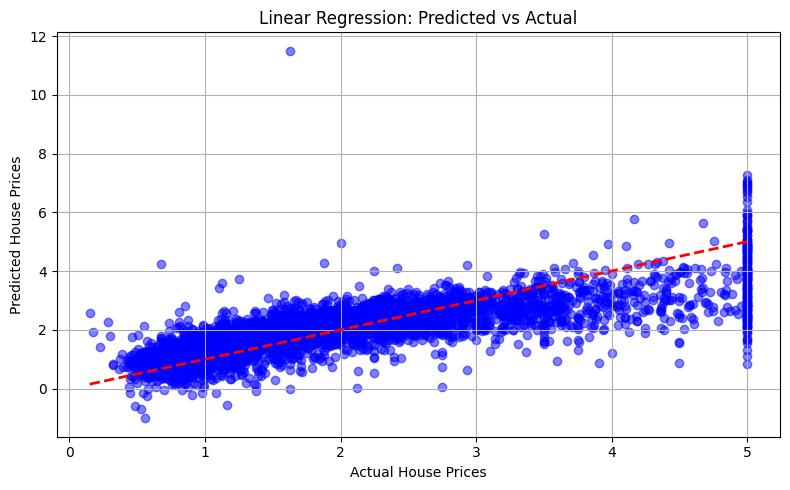

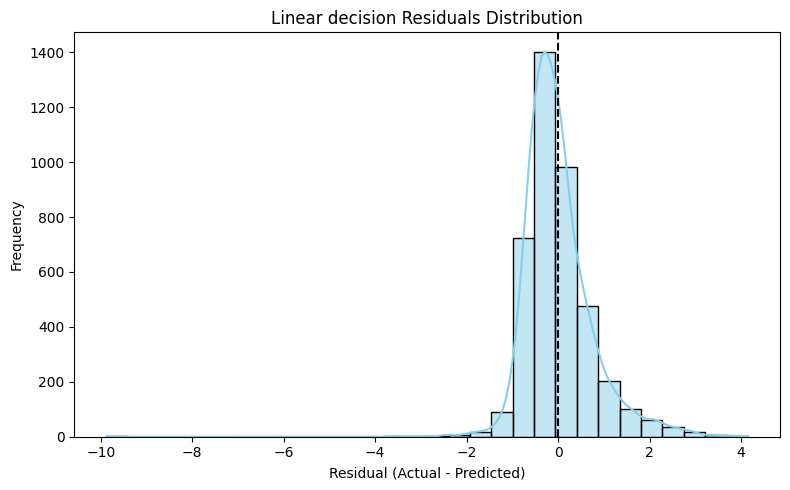

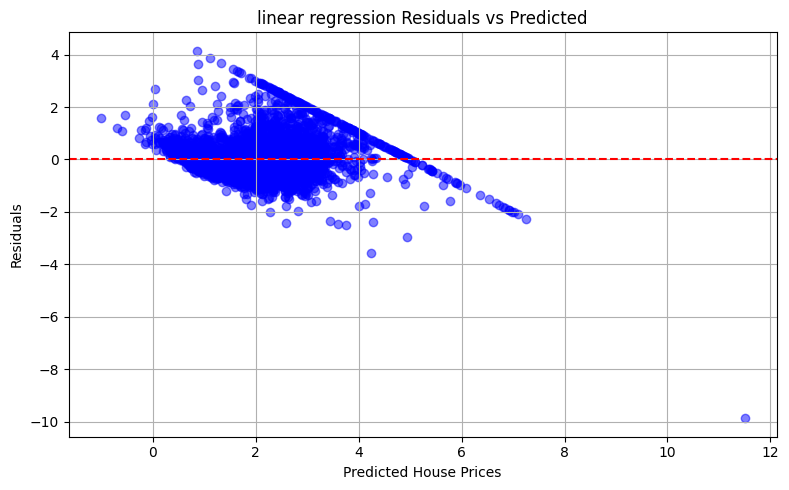

In [ ]:
#linear regression
import matplotlib.pyplot as plt
import seaborn as sns


# Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_lr_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual Plot
lr_residuals = y_test - y_lr_pred

plt.figure(figsize=(8, 5))
sns.histplot(lr_residuals, kde=True, bins=30, color="skyblue")
plt.axvline(0, color='black', linestyle='--')
plt.title("Linear decision Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional: Residuals vs Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_lr_pred, lr_residuals, alpha=0.5,color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("linear regression Residuals vs Predicted")
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


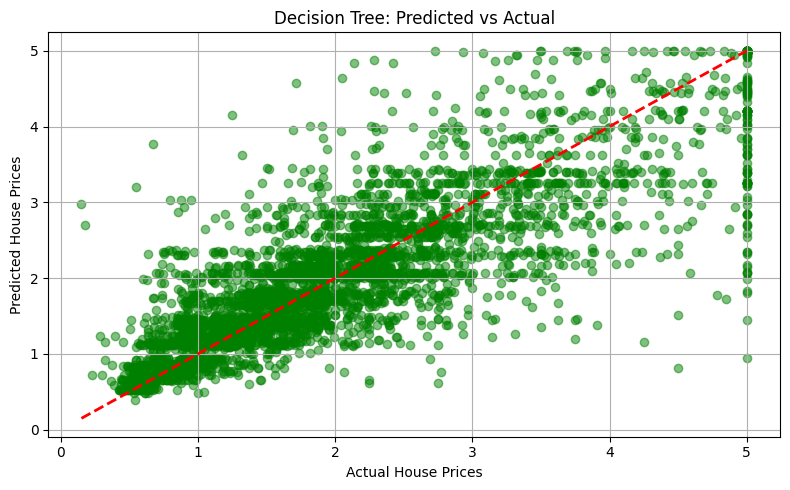

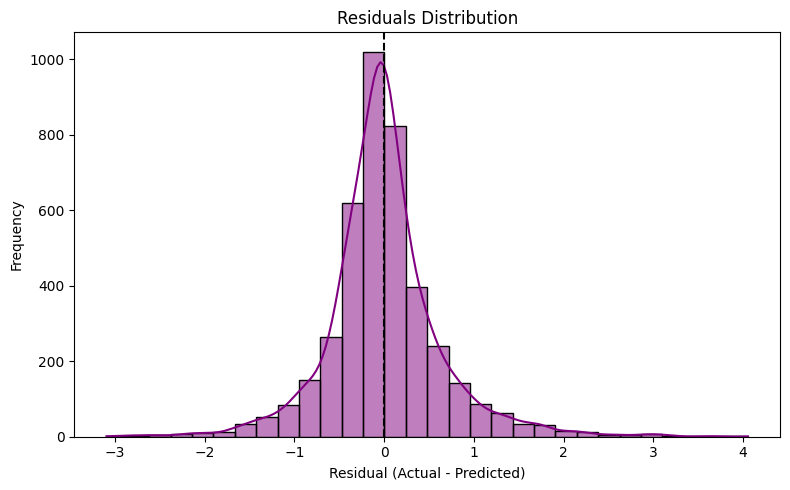

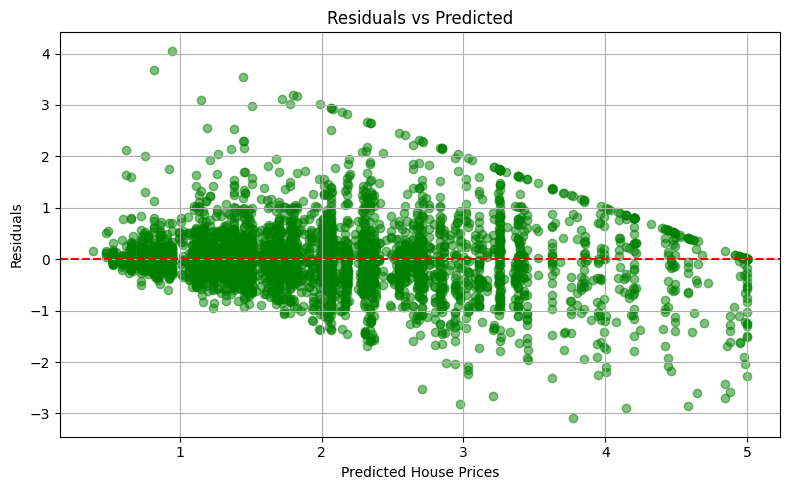

In [ ]:
#decision tree
import matplotlib.pyplot as plt
import seaborn as sns


#  Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Decision Tree: Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.axvline(0, color='black', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Optional: Residuals vs Predicted Values
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5,color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted House Prices")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
joblib.dump(best_model, "best_tree_model.pkl")
print("✅ Model saved as best_tree_model.pkl")


✅ Model saved as best_tree_model.pkl


In [ ]:
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

✅ Scaler saved as scaler.pkl
